# 🧭 Proyecto: Comparación de Rentabilidades en Instrumentos Financieros Reales

**Trabajo Grupal 1 – Matemática Actuarial**

**Autores:** Luis Lapo, Cristian Ojeda

In [1]:
import sys
import os
import yaml

# Configuración
print("=" * 60)
print("🚀 INICIANDO PROYECTO DE SIMULACIÓN DE CARTERAS")
print("=" * 60)

# Cargar configuración
with open('config/settings.yaml', 'r') as f:
    config = yaml.safe_load(f)

print(f"\n📋 Configuración del Proyecto:")
print(f"   Nombre: {config['project']['name']}")
print(f"   Capital inicial: ${config['project']['initial_capital']:,}")
print(f"   Horizonte: {config['project']['simulation_horizon_years']} años")
print(f"   Retiros mensuales: ${config['project']['withdrawals']['amount']}")
print(f"   Iteraciones Monte Carlo: {config['simulation']['montecarlo_iterations']:,}")


🚀 INICIANDO PROYECTO DE SIMULACIÓN DE CARTERAS

📋 Configuración del Proyecto:
   Nombre: Comparacion_de_Rentabilidades
   Capital inicial: $100,000
   Horizonte: 10 años
   Retiros mensuales: $1200
   Iteraciones Monte Carlo: 10,000


## Paso 1: Descarga y Procesamiento de Datos


In [2]:
# Ejecutar procesamiento de datos
from src.data_preprocessing import process_data

prices, returns, stats = process_data('config/settings.yaml')


📊 PROCESAMIENTO DE DATOS FINANCIEROS

1. Descargando datos históricos...
Descargando S&P 500 Index (^GSPC)...
  ✅ Datos descargados: 2516 registros
Descargando US Treasury 7-10Y (IEF)...
  ✅ Datos descargados: 2516 registros
Descargando Gold Futures (GC=F)...
  ✅ Datos descargados: 2513 registros
Descargando 3-Month Treasury Bill (^IRX)...
  ✅ Datos descargados: 2515 registros

2. Calculando retornos...
  Consolidando retornos por fecha...


/Users/luis/Desktop/UNIVERSIDAD/Actuarial/Cursor-Taller/V3/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


  ✅ Retornos guardados en data/processed/returns.csv
  📊 Datos consolidados: 2515 días únicos
  📊 Valores faltantes: 6 (0.06%)

3. Calculando estadísticas anualizadas...
  ✅ Estadísticas guardadas en data/processed/asset_statistics.csv

📈 ESTADÍSTICAS ANUALIZADAS
 asset  mean_return_annual  std_dev_annual  sharpe_ratio  observations
stocks            0.105209        0.178901      0.588084          2515
 bonds            0.005885        0.067233      0.087535          2515
  gold            0.079863        0.146874      0.543751          2512
  cash            0.491419        3.833691      0.128184          2512


## Paso 2: Simulación Monte Carlo


In [3]:
# Ejecutar simulaciones (esto puede tardar varios minutos)
from src.simulation import run_simulation

results = run_simulation('config/settings.yaml')


🎲 SIMULACIÓN MONTE CARLO DE CARTERAS

1. Cargando estadísticas de activos...

  💰 Contribuciones periódicas: $100.00/mes (aportes)
  📅 Décimos sueldos: $1,200.00 en meses [6, 12]

2. Simulando cartera: 60% Acciones / 40% Bonos
   Escenario: base
Ejecutando 10000 simulaciones Monte Carlo...
  Progreso: 1000/10000
  Progreso: 2000/10000
  Progreso: 3000/10000
  Progreso: 4000/10000
  Progreso: 5000/10000
  Progreso: 6000/10000
  Progreso: 7000/10000
  Progreso: 8000/10000
  Progreso: 9000/10000
  Progreso: 10000/10000
      ✅ Tasa de supervivencia: 40.81%
      ✅ Valor final promedio: $23,088.17
   Escenario: optimistic
Ejecutando 10000 simulaciones Monte Carlo...
  Progreso: 1000/10000
  Progreso: 2000/10000
  Progreso: 3000/10000
  Progreso: 4000/10000
  Progreso: 5000/10000
  Progreso: 6000/10000
  Progreso: 7000/10000
  Progreso: 8000/10000
  Progreso: 9000/10000
  Progreso: 10000/10000
      ✅ Tasa de supervivencia: 48.99%
      ✅ Valor final promedio: $28,369.65
   Escenario: pessi

## Paso 3: Análisis de Sensibilidad


In [4]:
# Ejecutar análisis de sensibilidad
from src.sensitivity_analysis import analyze_sensitivity

analysis = analyze_sensitivity('config/settings.yaml')


📊 ANÁLISIS DE SENSIBILIDAD Y ESCENARIOS

1. Cargando resultados de simulaciones...

2. Comparando escenarios económicos...
  ✅ Guardado en: results/tables/scenario_comparison.csv

3. Comparando carteras por escenario...
  ✅ base: results/tables/portfolio_comparison_base.csv
  ✅ optimistic: results/tables/portfolio_comparison_optimistic.csv
  ✅ pessimistic: results/tables/portfolio_comparison_pessimistic.csv

📈 RESUMEN DE COMPARACIÓN DE ESCENARIOS
portfolio    scenario  survival_rate  mean_final_value  percentile_5  percentile_95
cartera_1        base          40.81      23088.167261           0.0  117183.593131
cartera_1  optimistic          48.99      28369.653062           0.0  130283.551858
cartera_1 pessimistic          19.83      11301.715746           0.0   74494.848208
cartera_2        base          41.52      14192.332041           0.0   69615.204811
cartera_2  optimistic          52.69      19280.379386           0.0   81796.964624
cartera_2 pessimistic          14.90       44

## Paso 4: Generar Visualizaciones


📊 GENERACIÓN DE VISUALIZACIONES

1. Cargando resultados...

2. Cargando historiales de simulación...

3. Generando gráficos de evolución del capital por cartera...
  ✅ Gráfico guardado: results/figures/evolution_cartera_1_base.png
  ✅ Gráfico guardado: results/figures/evolution_cartera_1_optimistic.png
  ✅ Gráfico guardado: results/figures/evolution_cartera_1_pessimistic.png
  ✅ Gráfico guardado: results/figures/evolution_cartera_2_base.png
  ✅ Gráfico guardado: results/figures/evolution_cartera_2_optimistic.png
  ✅ Gráfico guardado: results/figures/evolution_cartera_2_pessimistic.png
  ✅ Gráfico guardado: results/figures/evolution_cartera_3_base.png
  ✅ Gráfico guardado: results/figures/evolution_cartera_3_optimistic.png
  ✅ Gráfico guardado: results/figures/evolution_cartera_3_pessimistic.png

4. Generando gráficos de comparación de evolución entre carteras...
  ✅ Gráfico guardado: results/figures/evolution_comparison_base.png
  ✅ Gráfico guardado: results/figures/evolution_compariso

/Users/luis/Desktop/UNIVERSIDAD/Actuarial/Cursor-Taller/V3/src/visualization.py:220: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


  ✅ Gráfico guardado: results/figures/distribution_cartera_2_base.png
  ✅ Gráfico guardado: results/figures/survival_cartera_2_base.png
  ✅ Gráfico guardado: results/figures/distribution_cartera_2_optimistic.png
  ✅ Gráfico guardado: results/figures/survival_cartera_2_optimistic.png
  ✅ Gráfico guardado: results/figures/distribution_cartera_2_pessimistic.png
  ✅ Gráfico guardado: results/figures/survival_cartera_2_pessimistic.png
  ✅ Gráfico guardado: results/figures/distribution_cartera_3_base.png
  ✅ Gráfico guardado: results/figures/survival_cartera_3_base.png
  ✅ Gráfico guardado: results/figures/distribution_cartera_3_optimistic.png
  ✅ Gráfico guardado: results/figures/survival_cartera_3_optimistic.png
  ✅ Gráfico guardado: results/figures/distribution_cartera_3_pessimistic.png
  ✅ Gráfico guardado: results/figures/survival_cartera_3_pessimistic.png

✅ VISUALIZACIONES COMPLETADAS
Gráficos guardados en: results/figures


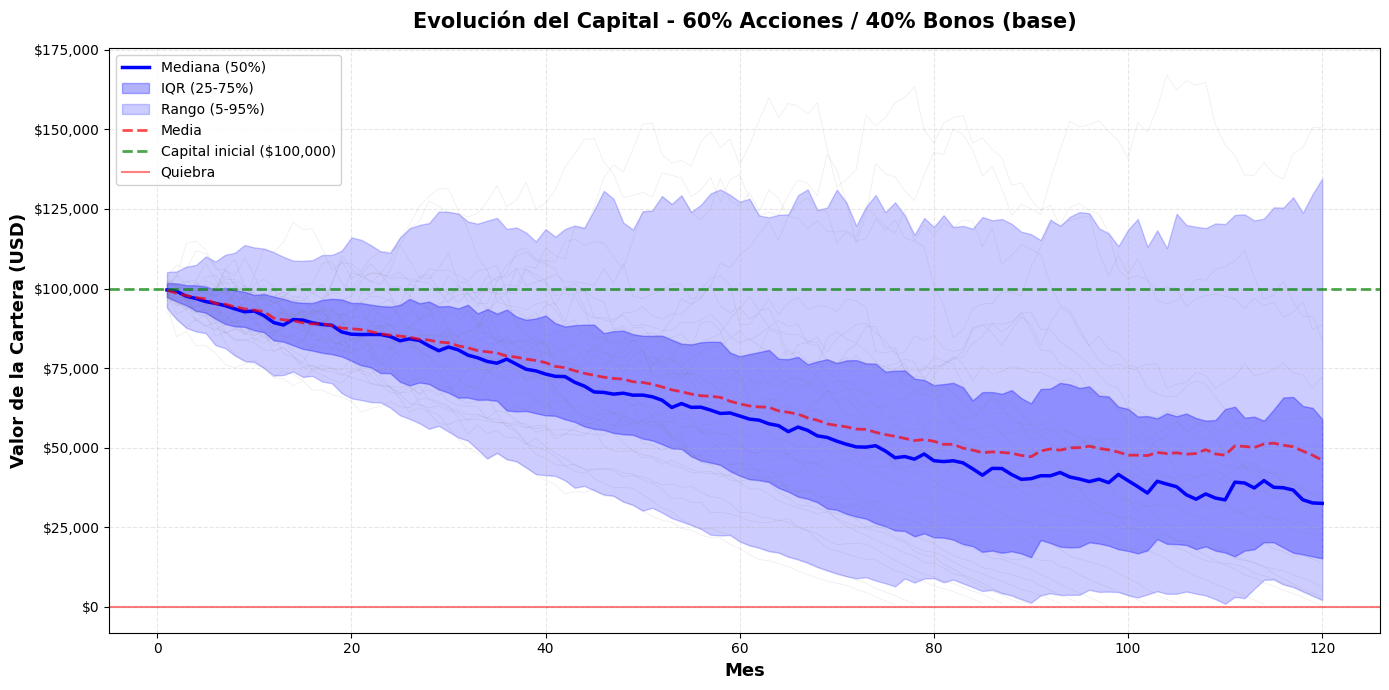

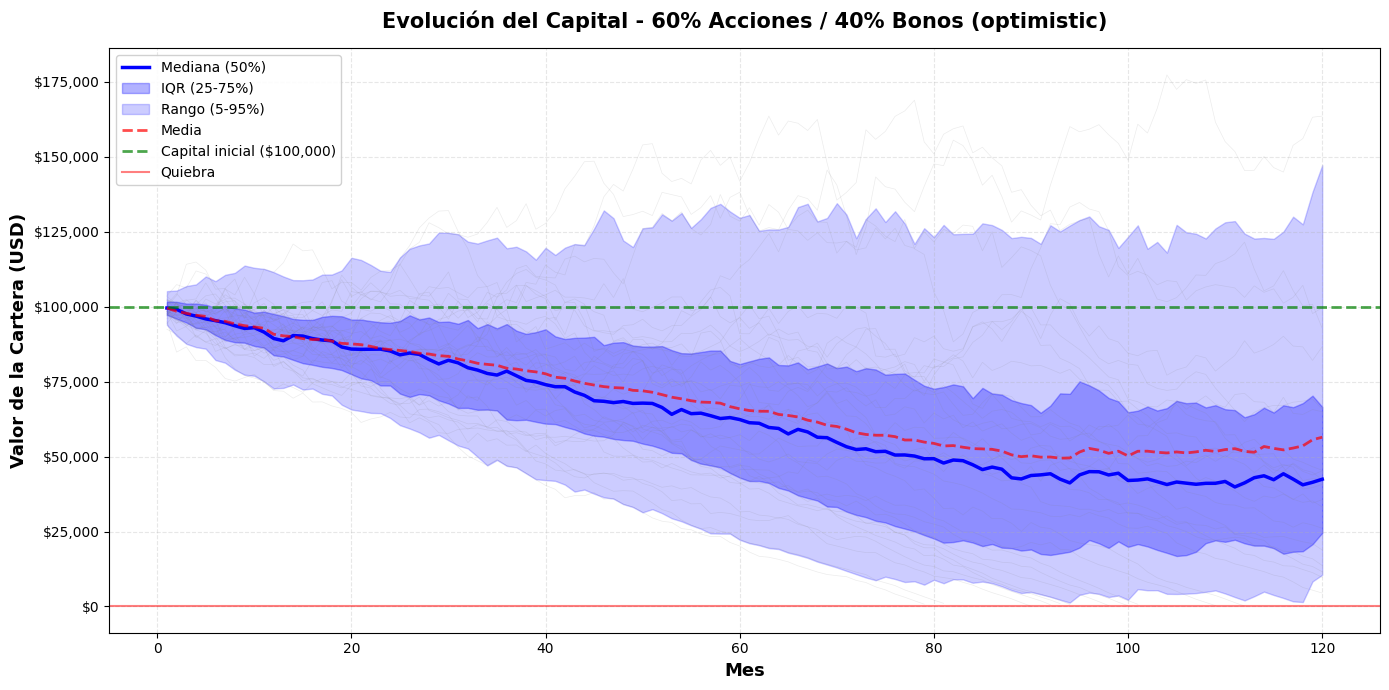

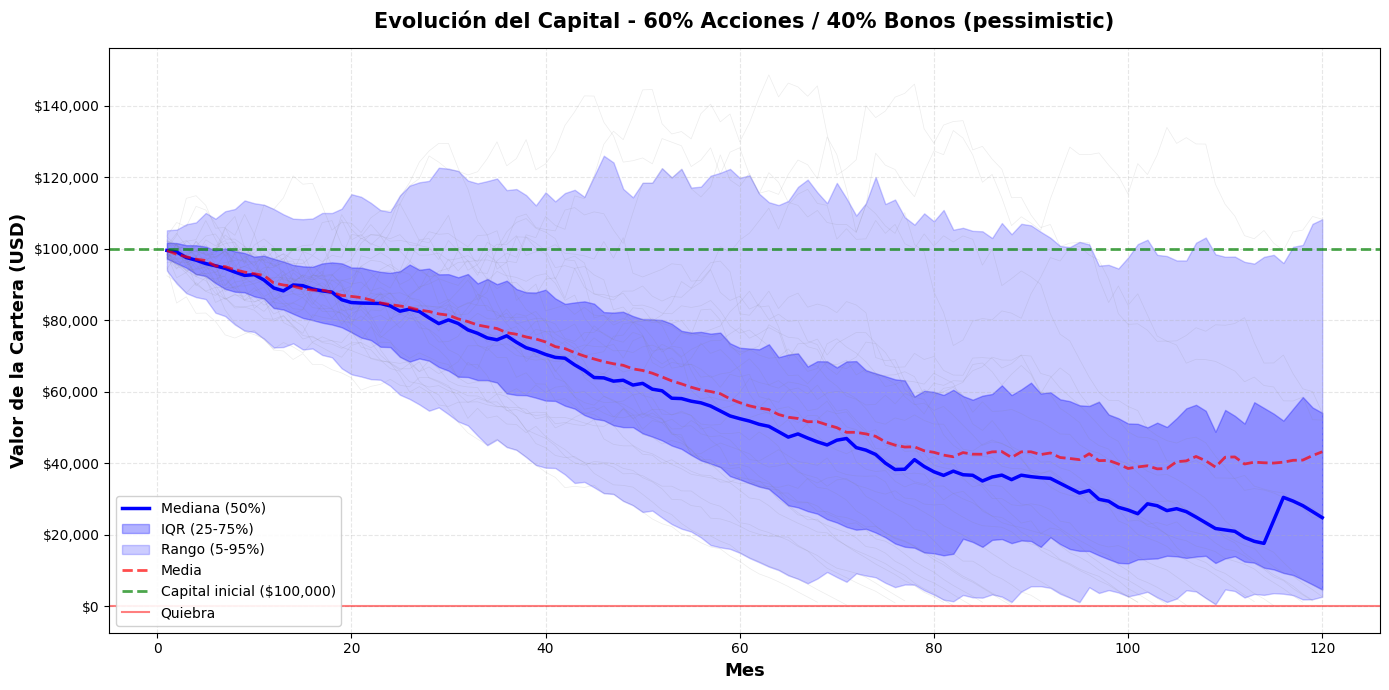

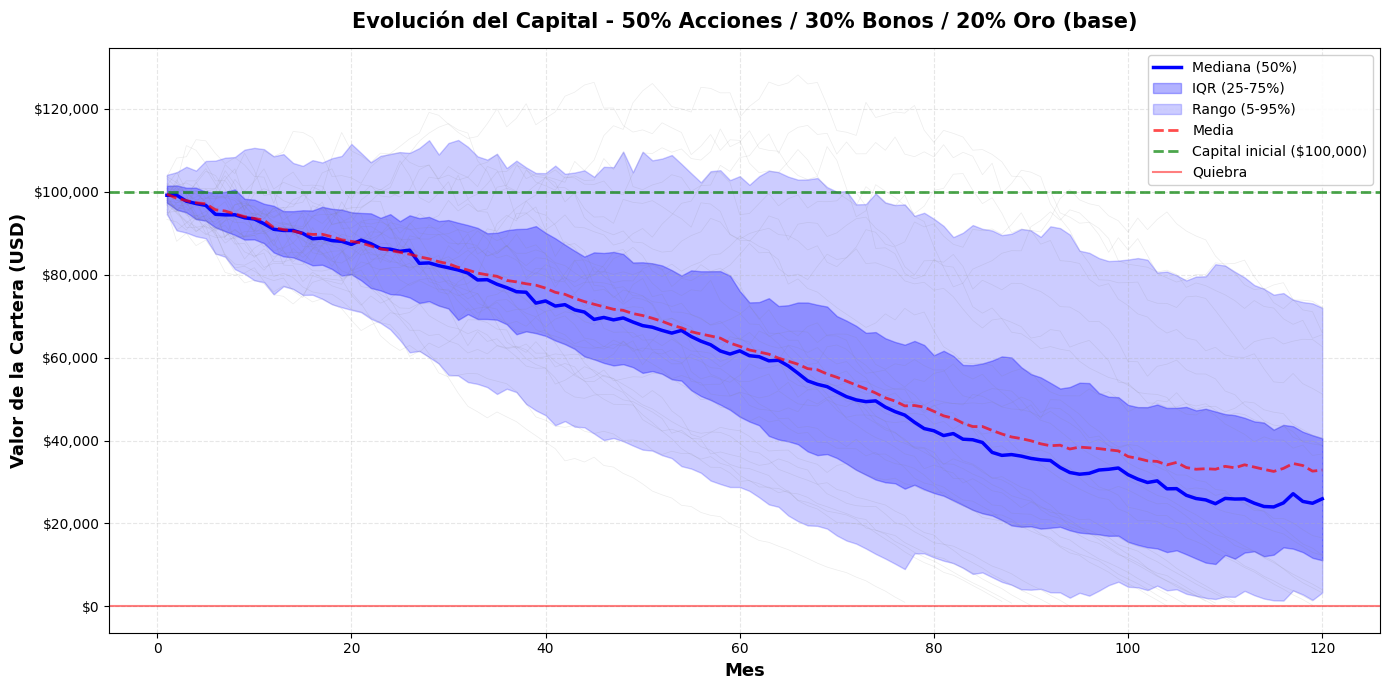

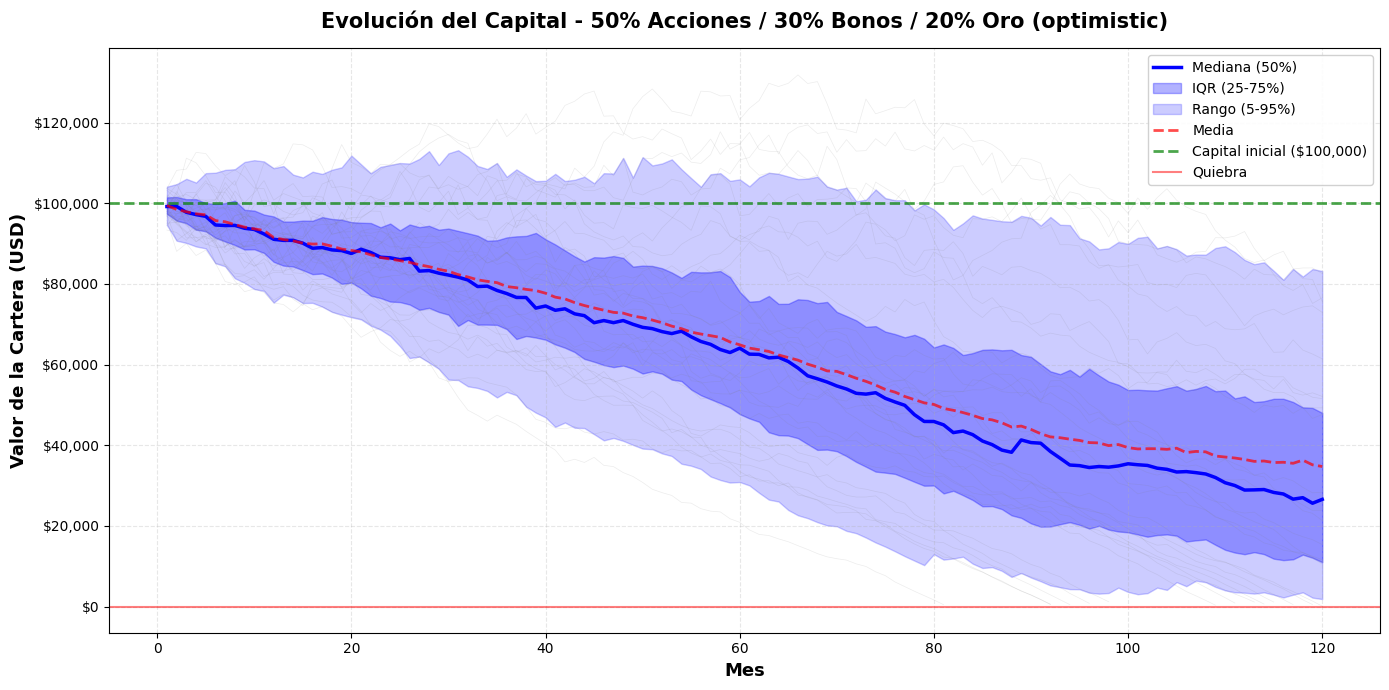

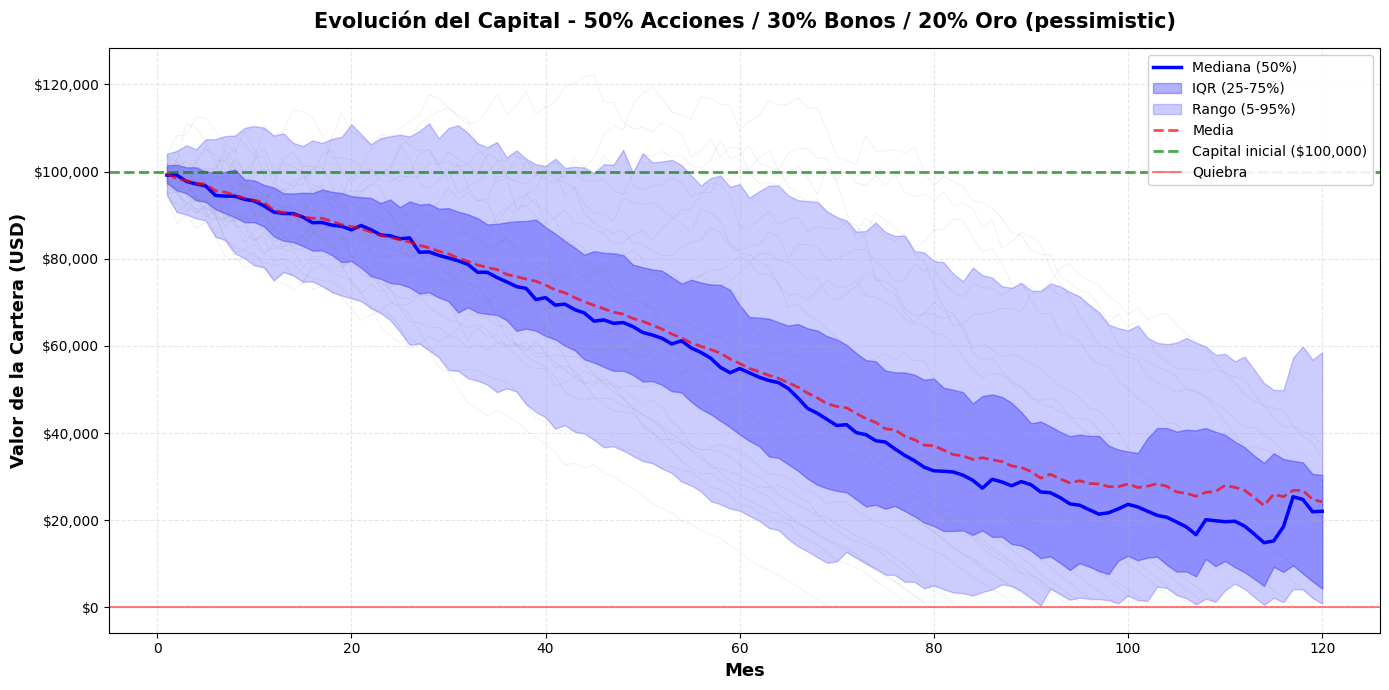

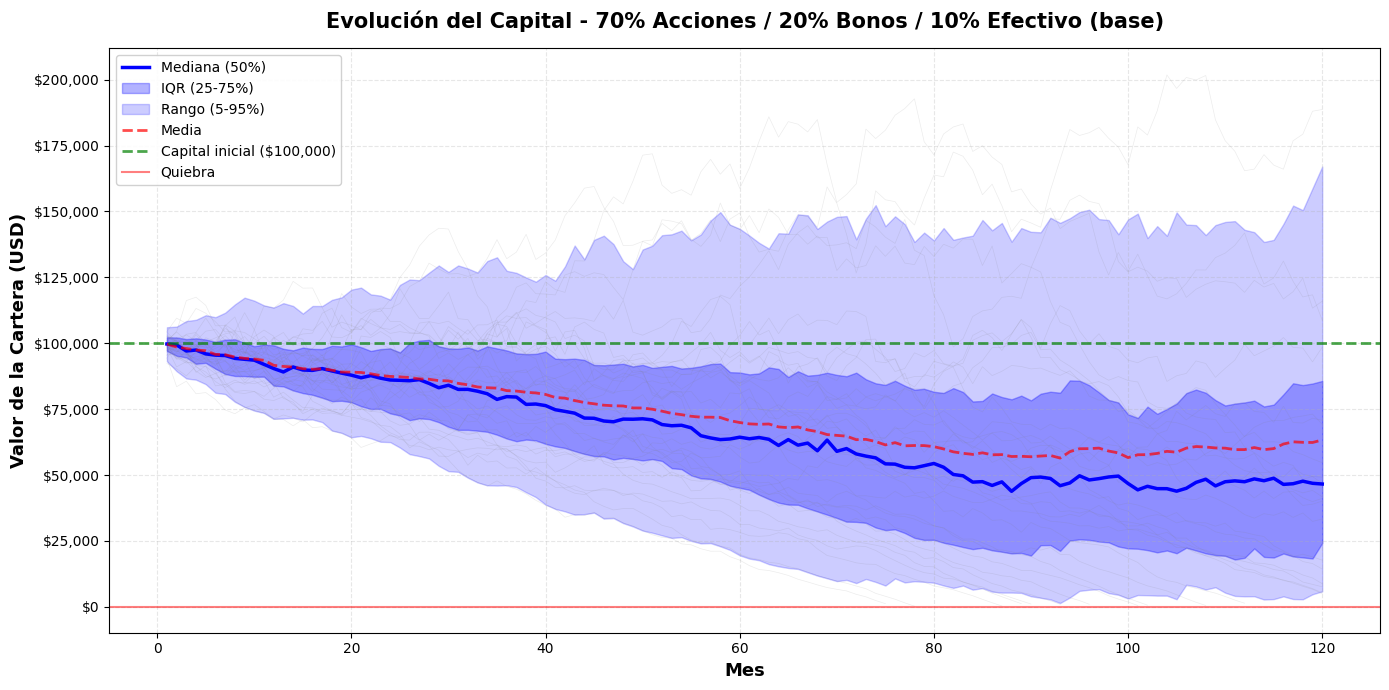

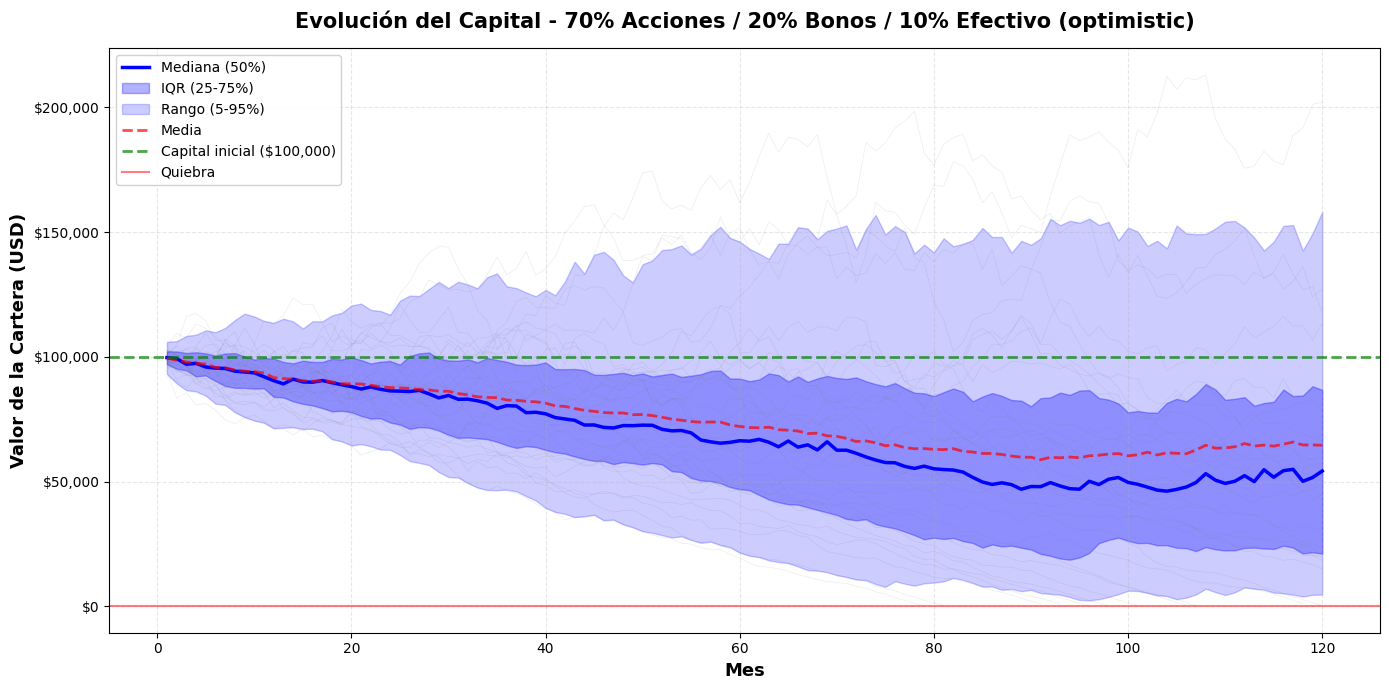

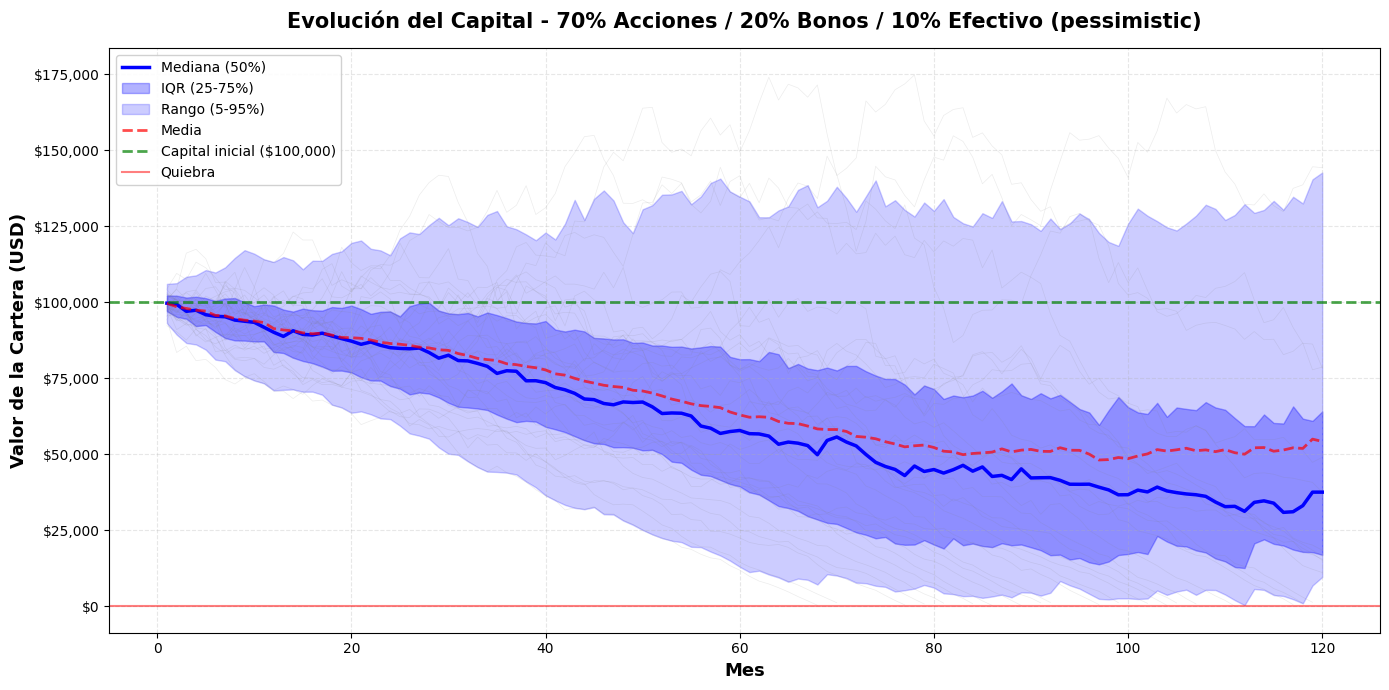

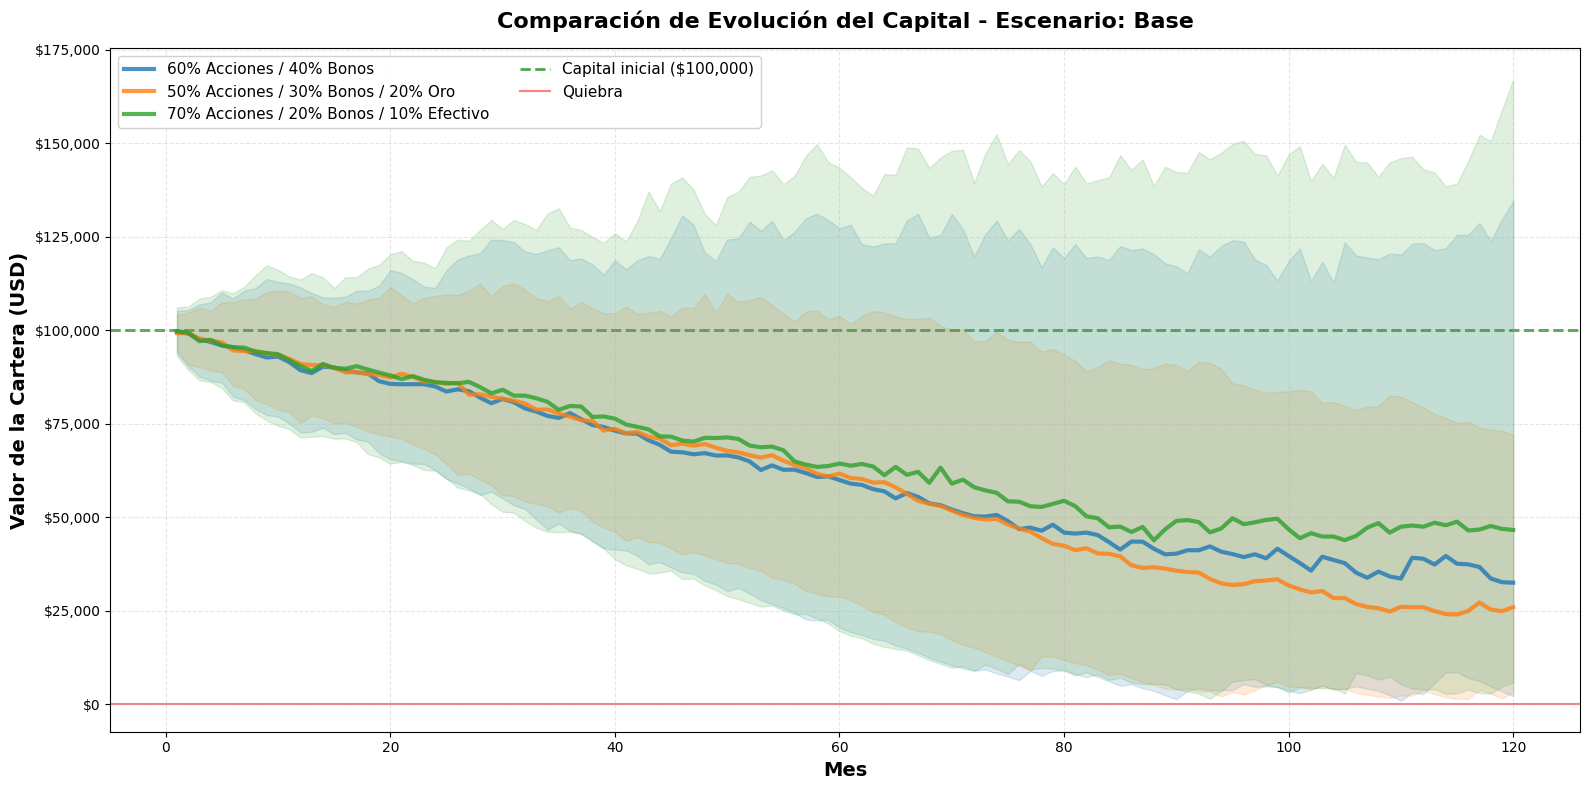

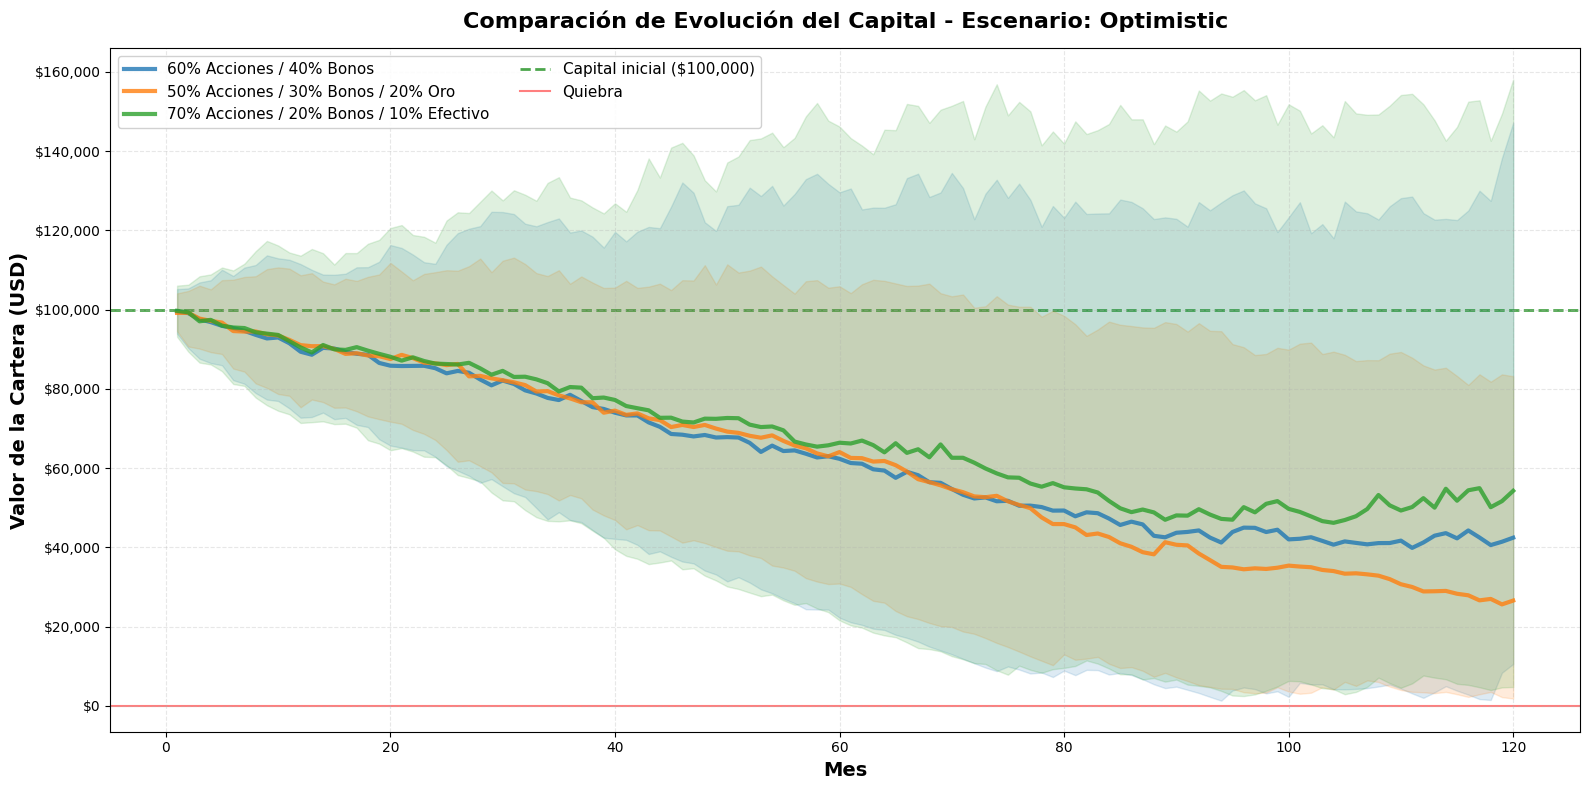

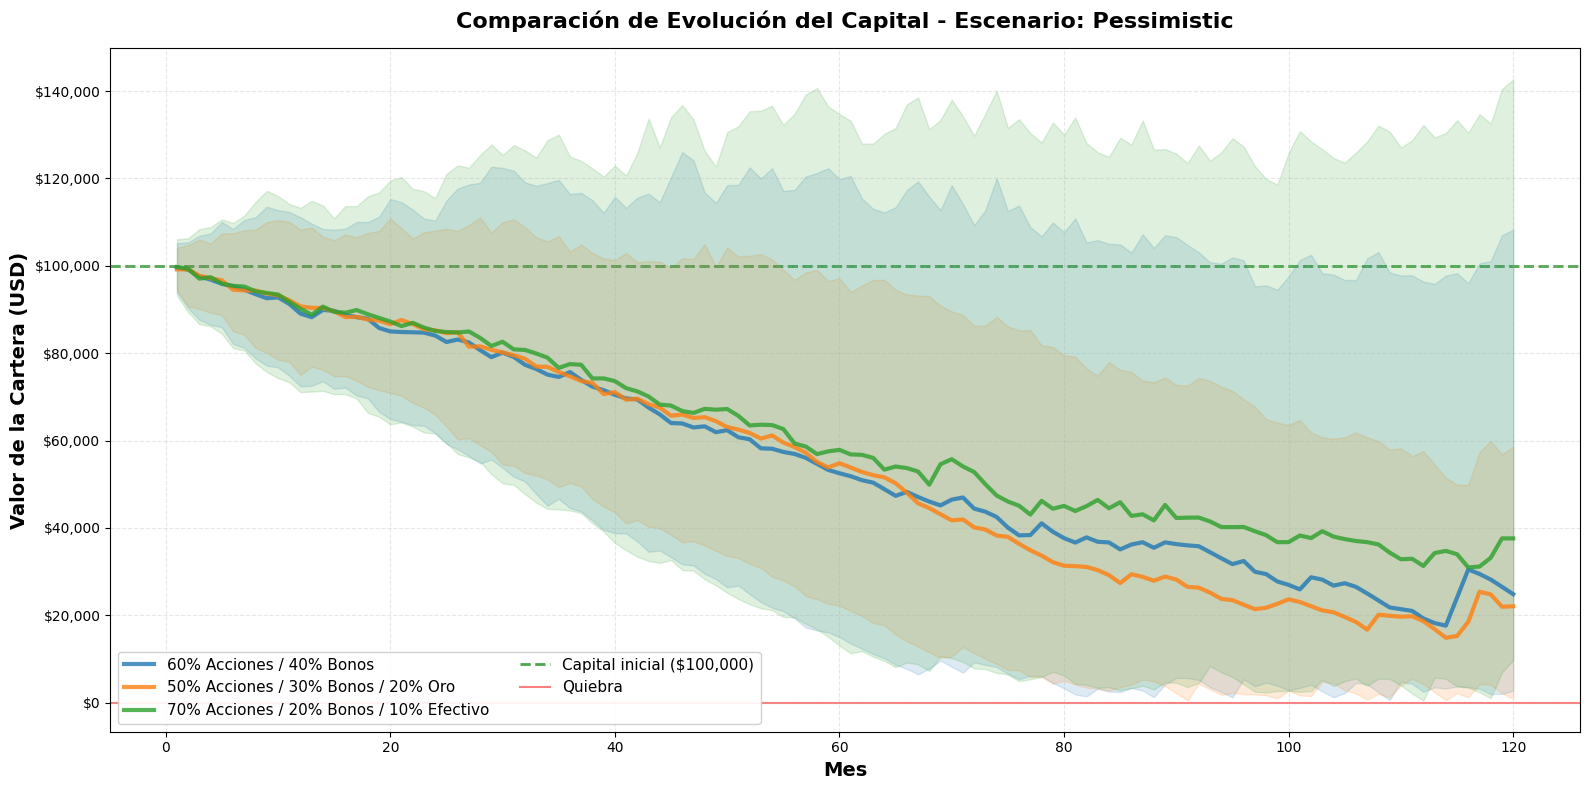

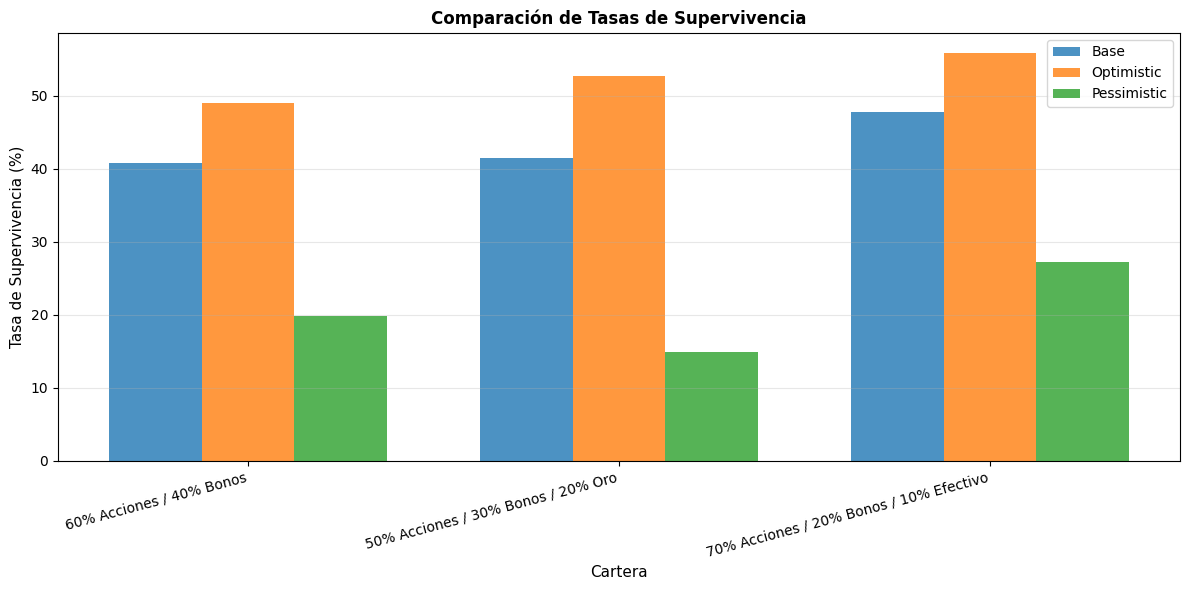

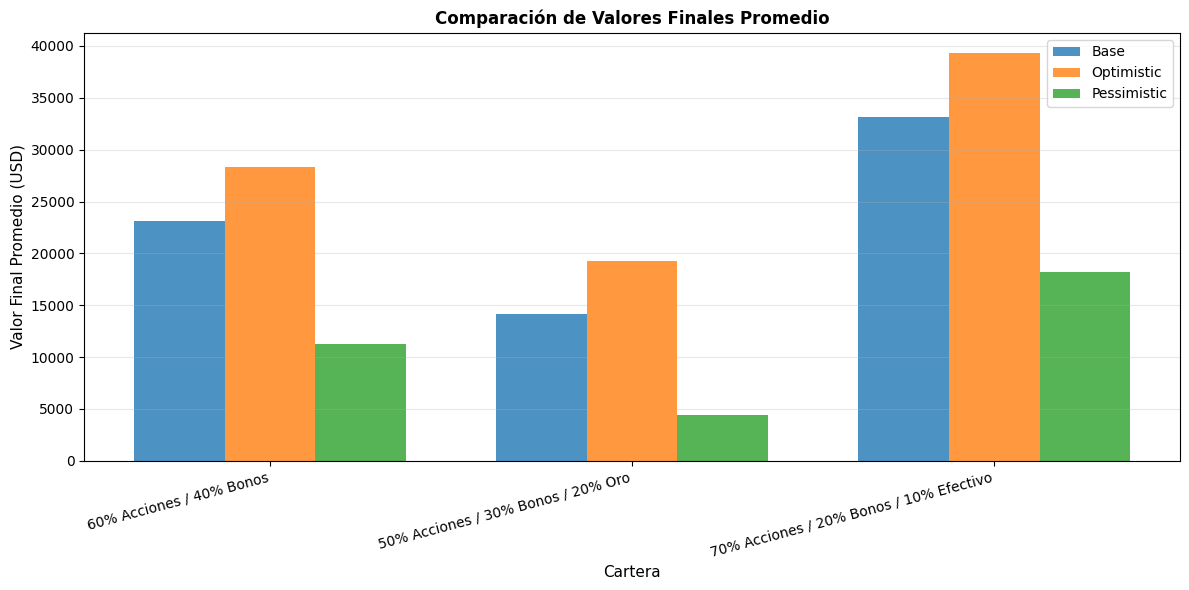

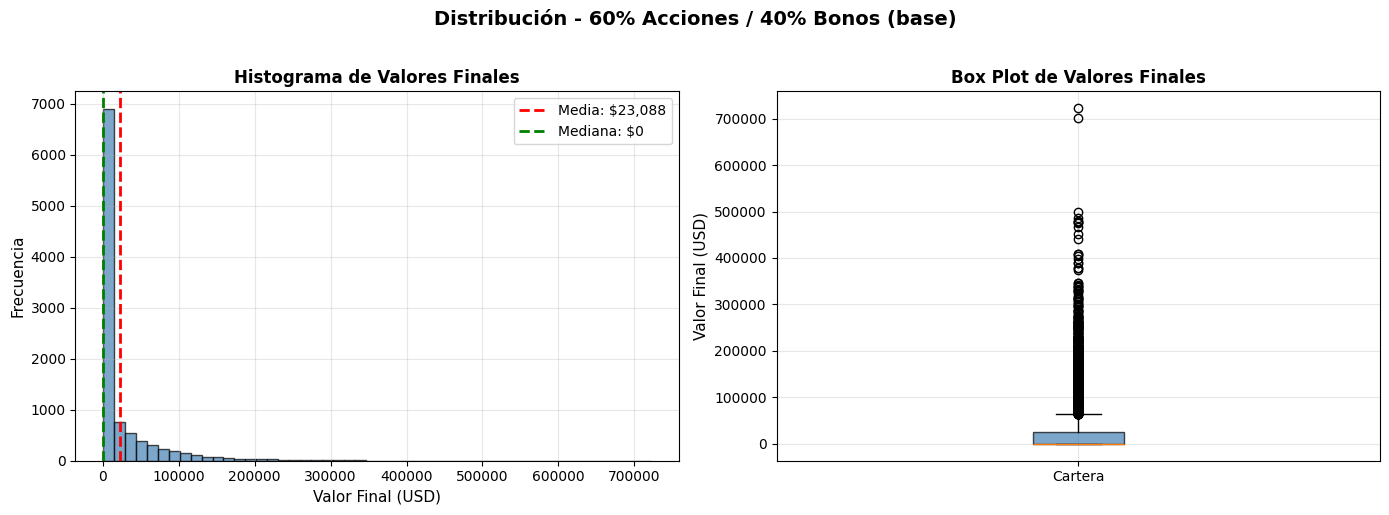

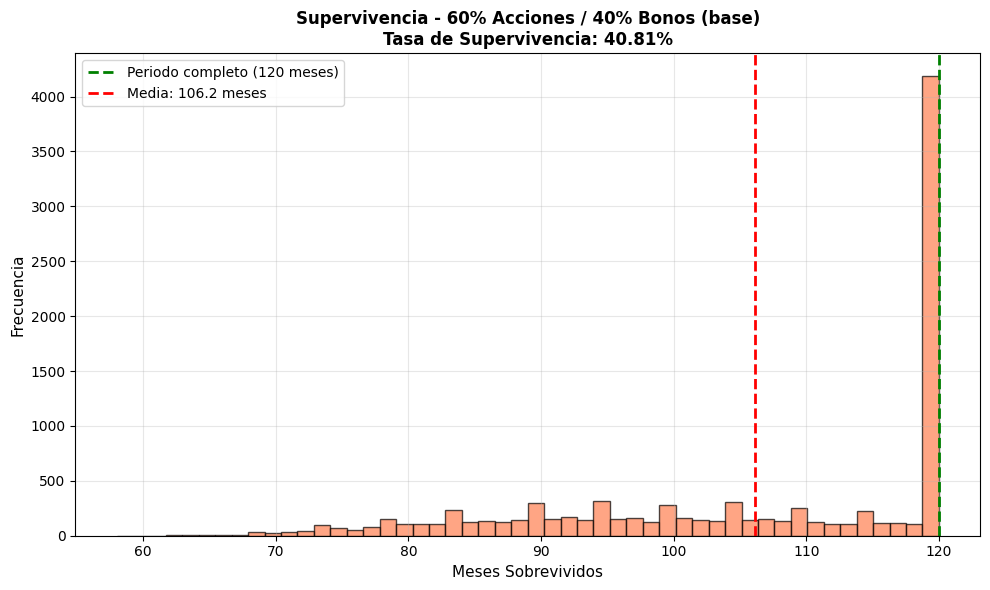

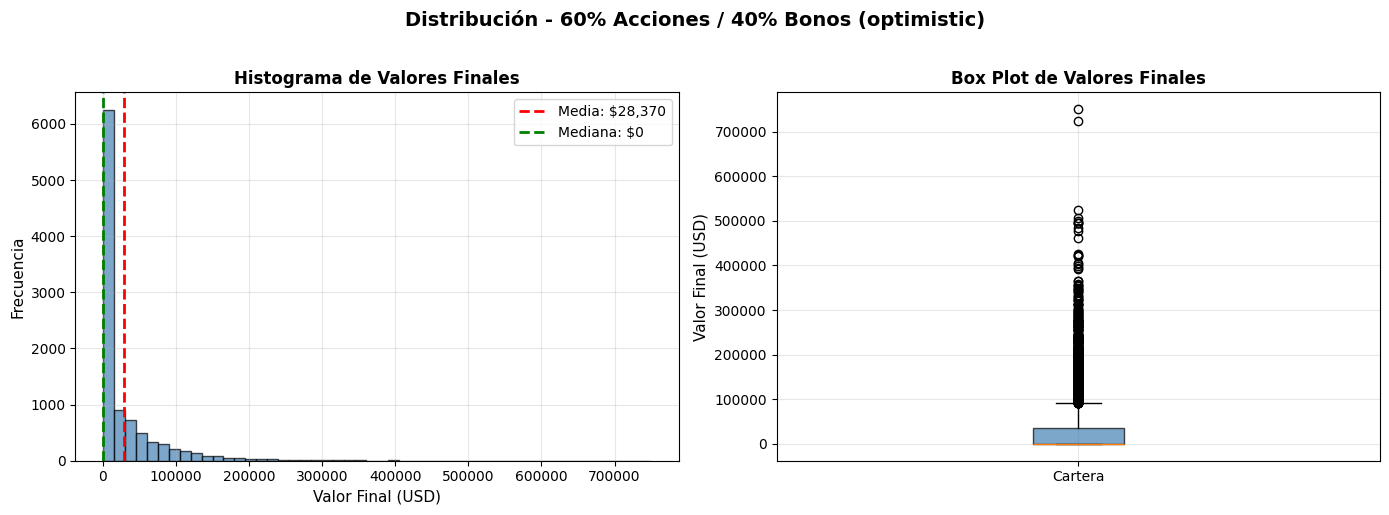

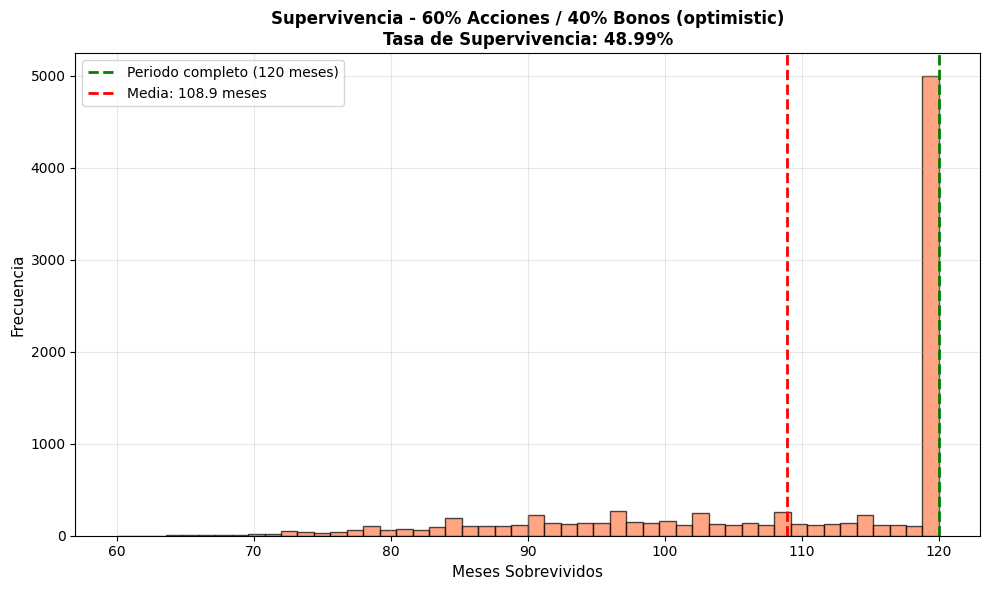

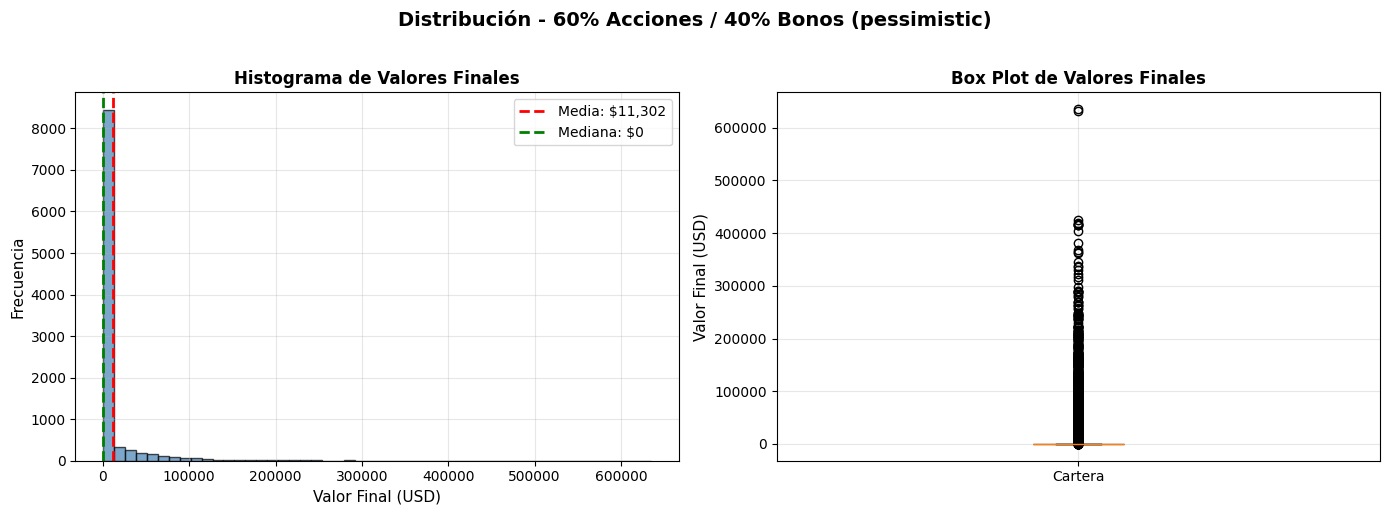

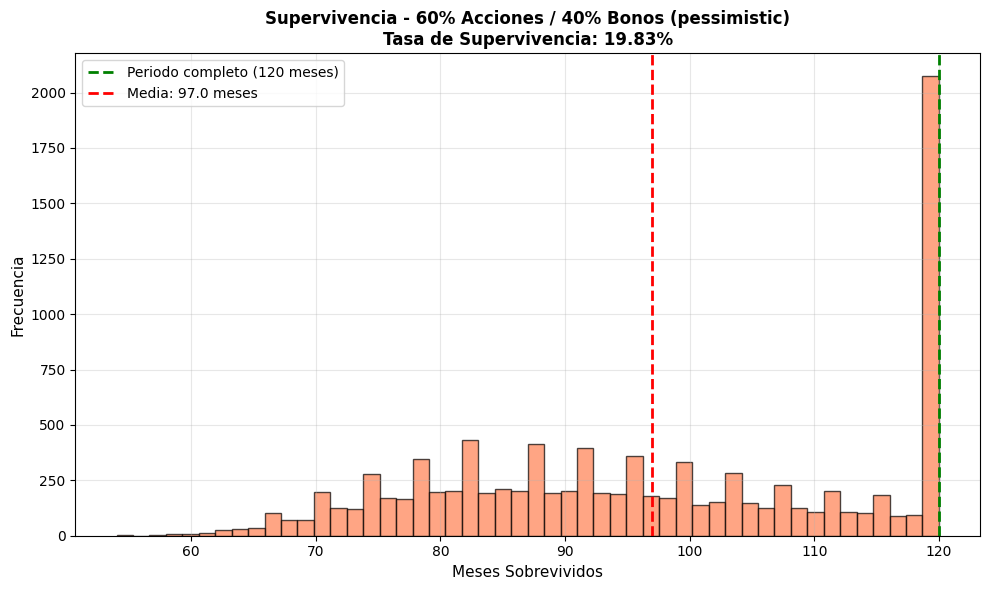

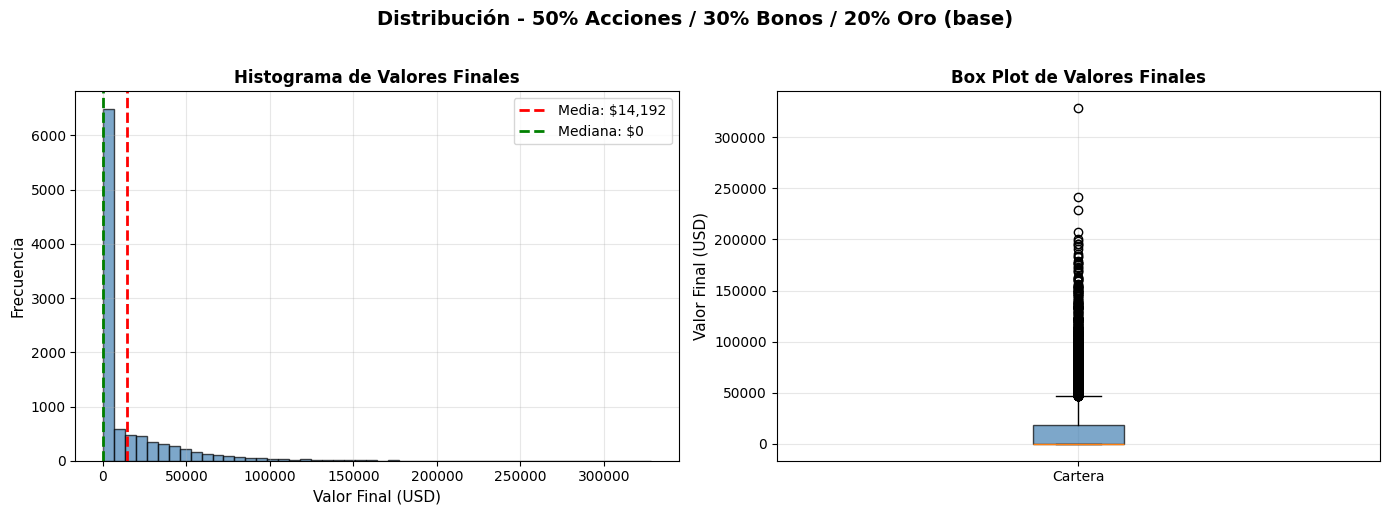

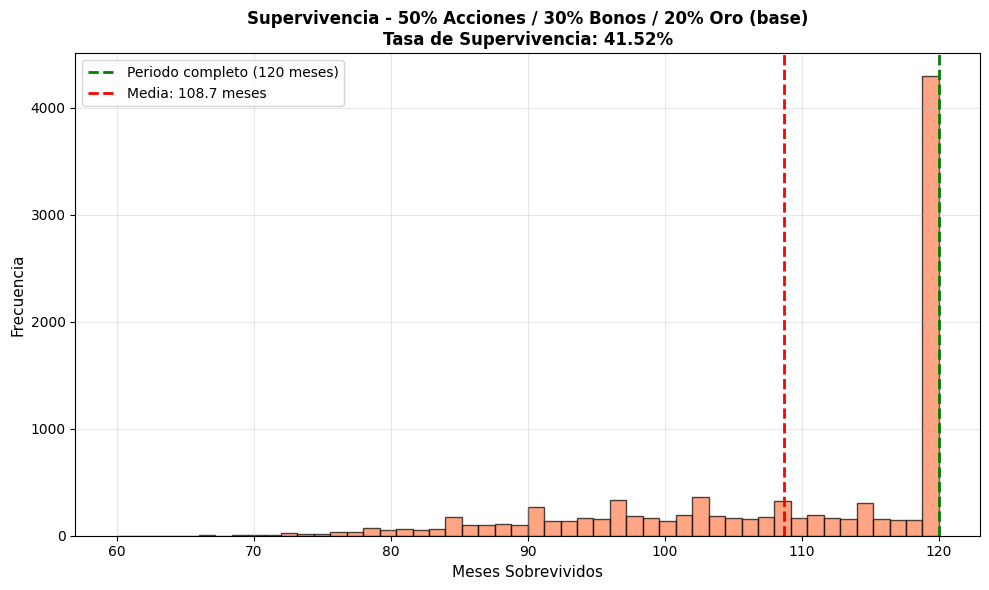

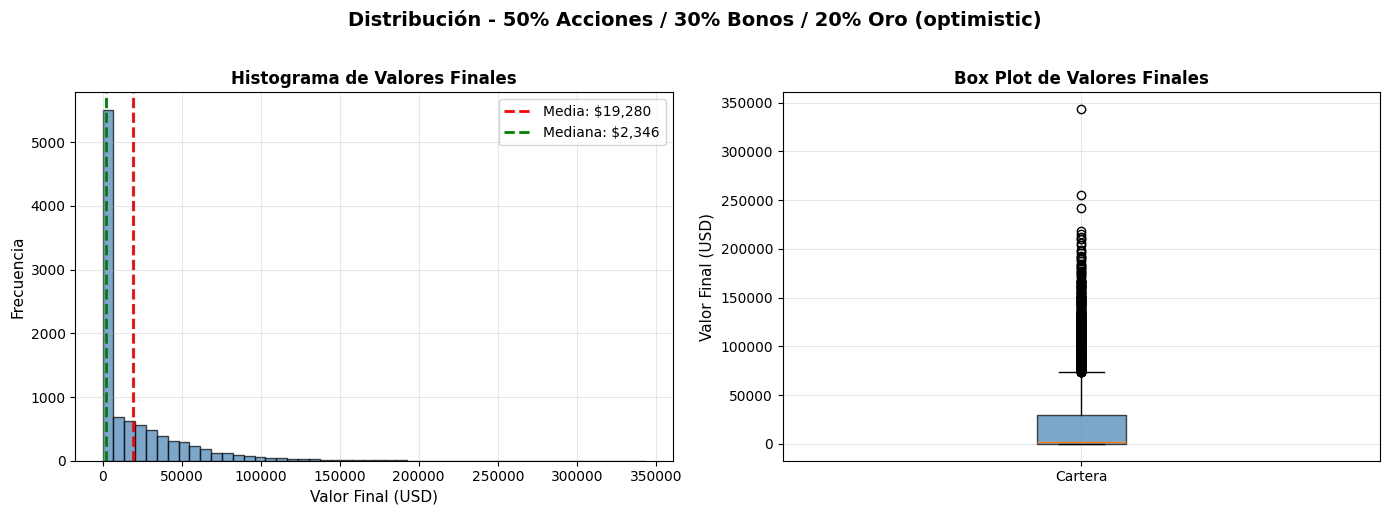

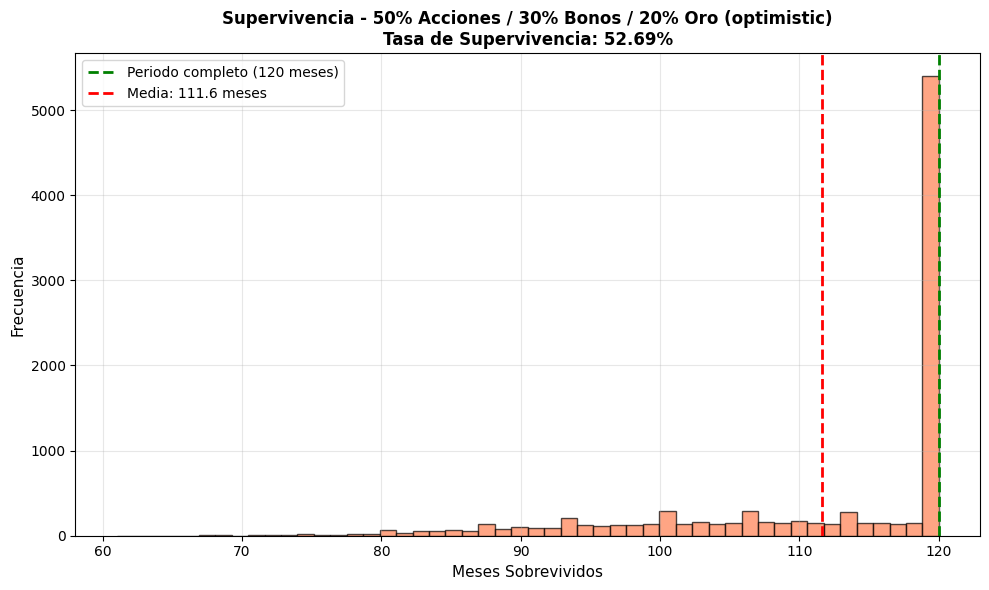

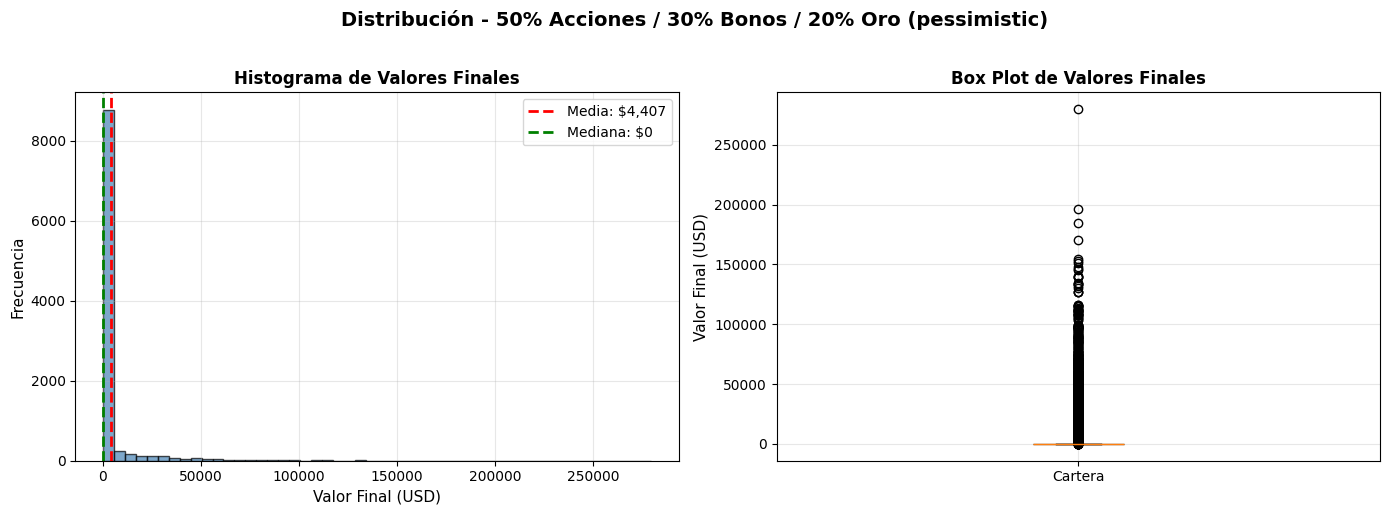

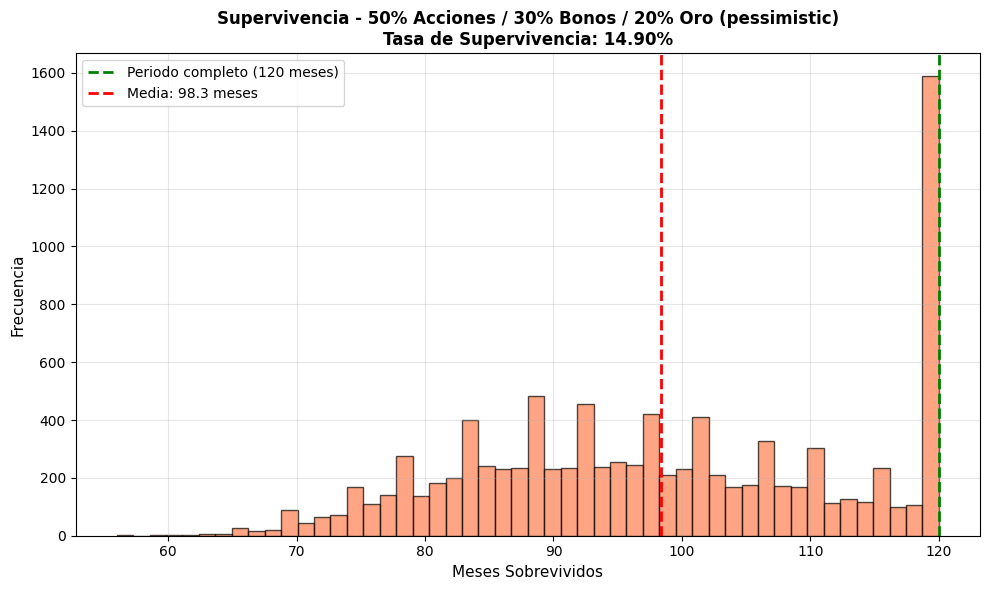

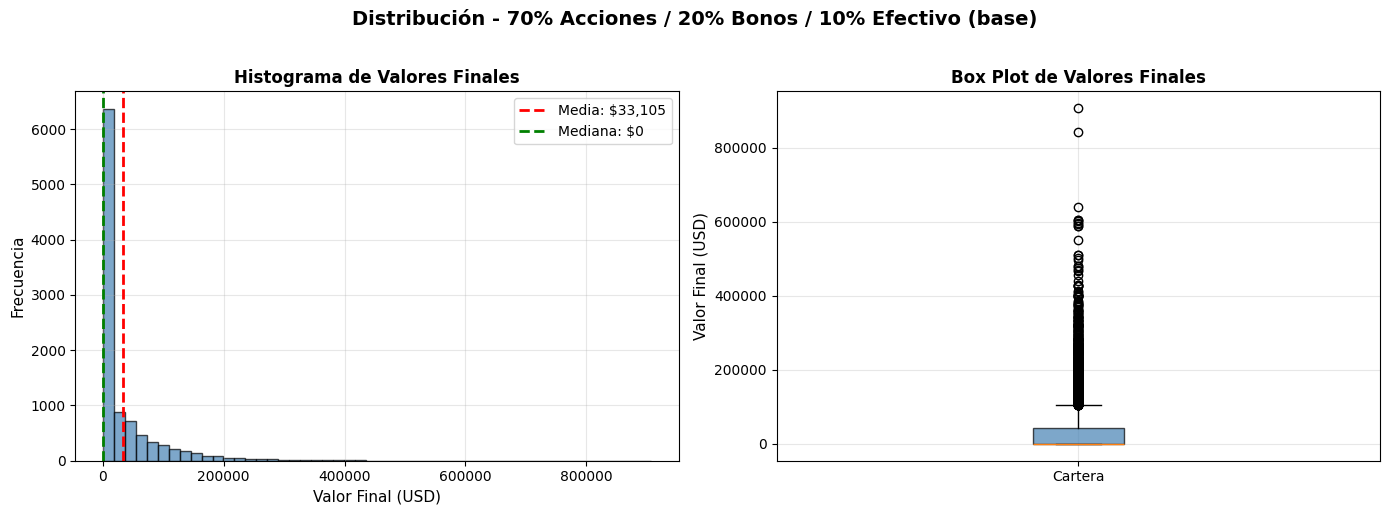

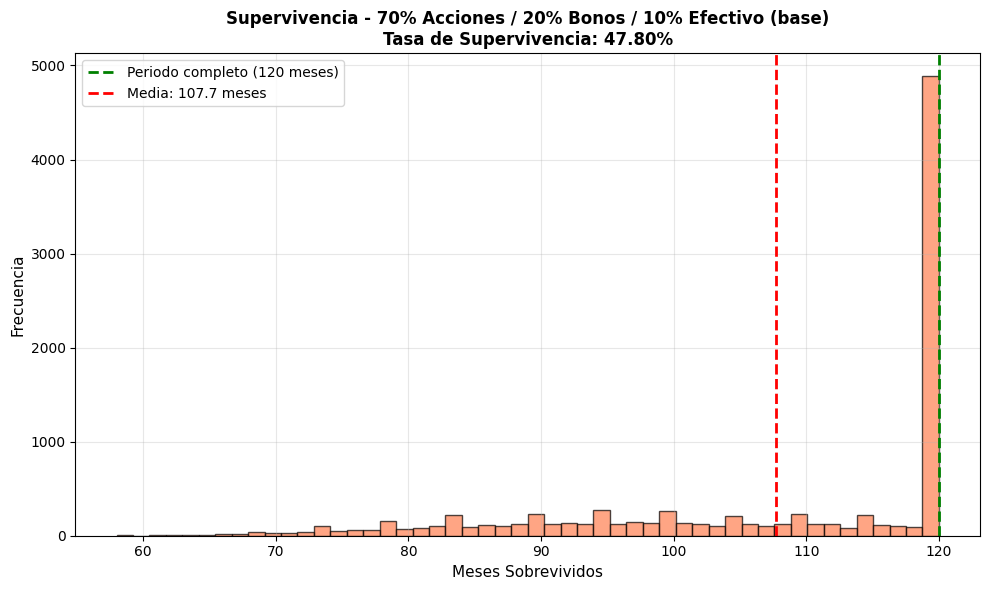

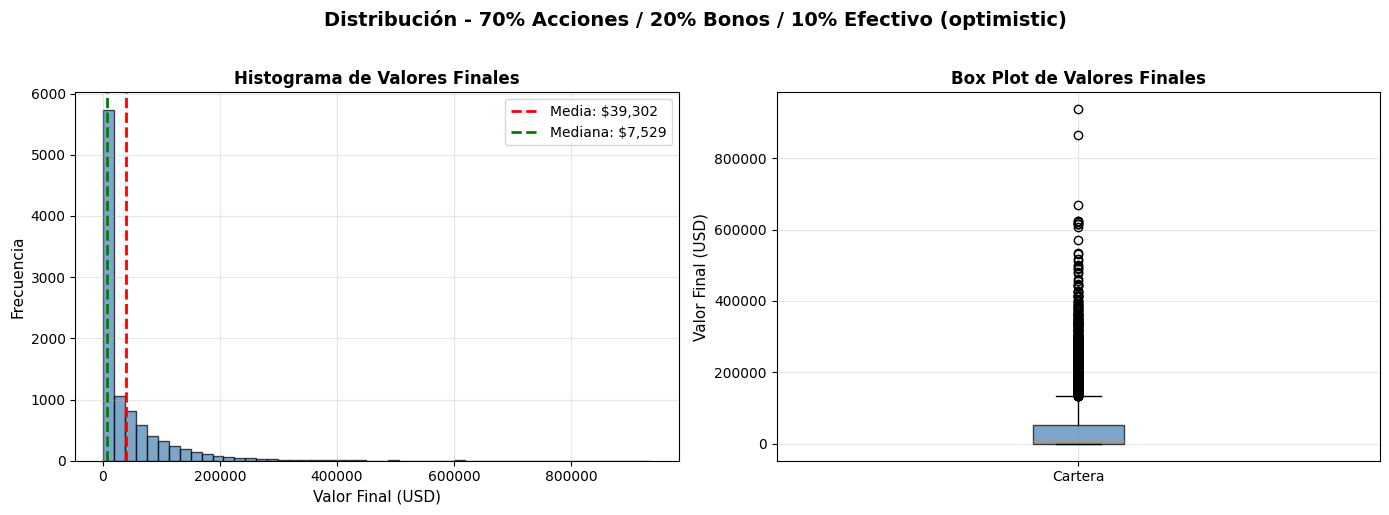

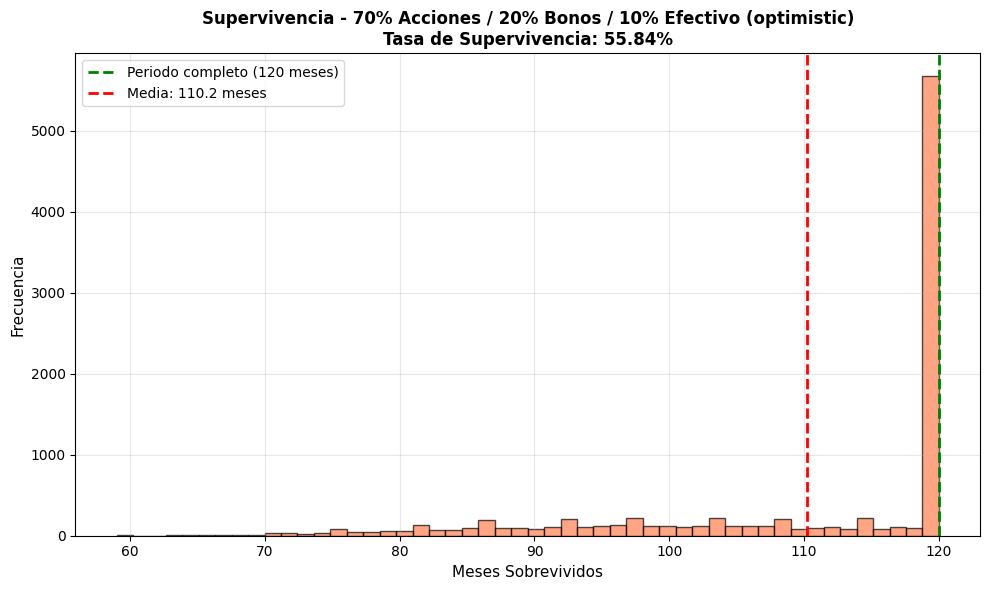

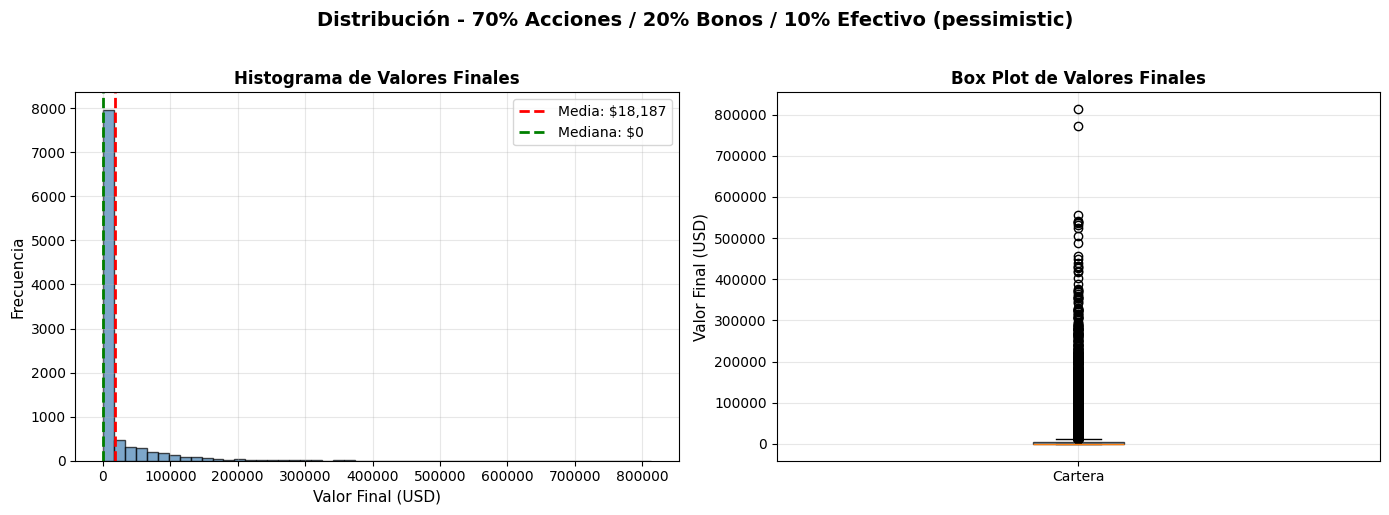

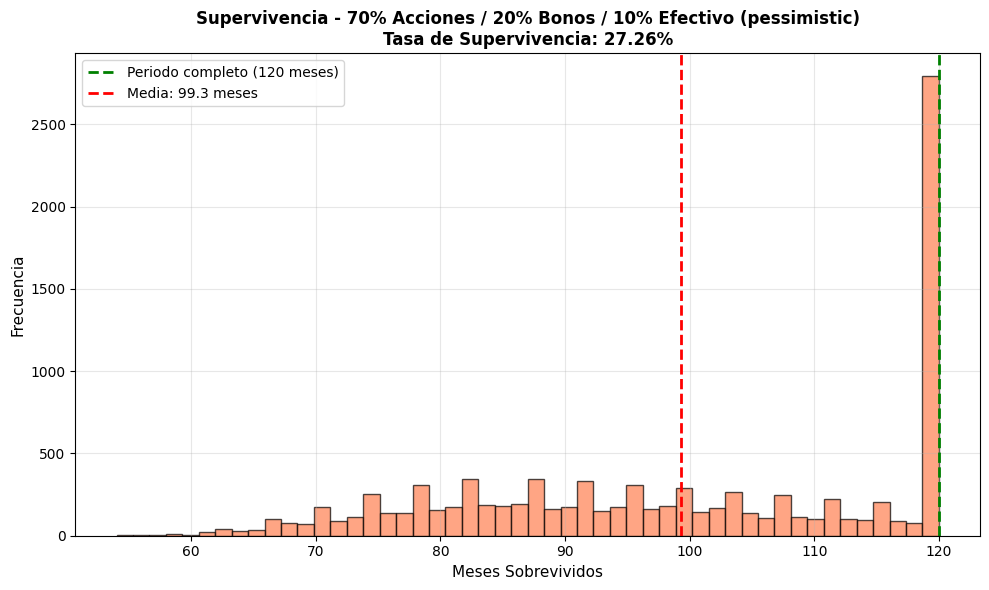

In [5]:
# Generar todas las visualizaciones
from src.visualization import generate_all_visualizations

generate_all_visualizations('config/settings.yaml')


## Resumen Final

Los resultados se han guardado en:
- **Datos procesados**: `data/processed/`
- **Resultados de simulaciones**: `results/simulations/`
- **Tablas comparativas**: `results/tables/`
- **Visualizaciones**: `results/figures/`

Para análisis detallado, consulta los notebooks específicos en la carpeta `notebooks/`.

## Análisis Técnico de Resultados

A continuación se presenta un análisis técnico completo de los resultados obtenidos.


In [6]:
# Cargar resultados para análisis resumido
from src.sensitivity_analysis import load_simulation_results, compare_portfolios
from src.generate_report import generate_latex_report
import subprocess
import os

print("=" * 80)
print("📊 RESUMEN EJECUTIVO DE RESULTADOS")
print("=" * 80)

results = load_simulation_results(config['project']['output_dir'])

if not results:
    print("\n⚠️  No se encontraron resultados de simulación.")
    print("   Ejecuta primero las simulaciones en el Paso 2.")
else:
    portfolios = config['portfolios']
    scenarios = config['economic_scenarios']
    
    # Análisis resumido
    print("\n✅ Resultados cargados: {} carteras analizadas\n".format(len(results)))
    
    # Comparación en escenario base
    base_comparison = compare_portfolios(results, scenario='base')
    best_overall = base_comparison.loc[base_comparison['survival_rate'].idxmax()]
    
    print("🏆 CARTERA RECOMENDADA: {}".format(portfolios[best_overall['portfolio']]['name']))
    print("   Supervivencia: {:.2f}%".format(best_overall['survival_rate']))
    print("   Valor final promedio: ${:,.0f}".format(best_overall['mean_final_value']))


📊 RESUMEN EJECUTIVO DE RESULTADOS

✅ Resultados cargados: 3 carteras analizadas

🏆 CARTERA RECOMENDADA: 70% Acciones / 20% Bonos / 10% Efectivo
   Supervivencia: 47.80%
   Valor final promedio: $33,105


## Resumen por escenario económico

A continuación se presenta un resumen ejecutivo de los resultados por escenario económico. Para el análisis técnico completo, consulta el informe LaTeX generado.


In [7]:
# Resumen ejecutivo por escenario económico
from src.sensitivity_analysis import compare_portfolios

print("\n" + "=" * 80)
print("1. RESUMEN EJECUTIVO POR ESCENARIO ECONÓMICO")
print("=" * 80)

for scenario_name, scenario_params in scenarios.items():
    print(f"\n📈 ESCENARIO: {scenario_name.upper()}")
    print(f"   Tasa de inflación: {scenario_params['inflation_rate']*100:.2f}% anual")
    print(f"   Costo de transacción: {scenario_params['transaction_cost']*100:.2f}%")
    print("-" * 80)
    
    # Comparar carteras en este escenario
    portfolio_comp = compare_portfolios(results, scenario=scenario_name)
    
    print(f"\n   {'Cartera':<40} {'Supervivencia':<15} {'Valor Final Prom.':<20} {'P5-P95':<20}")
    print("   " + "-" * 95)
    
    for _, row in portfolio_comp.iterrows():
        portfolio_label = portfolios[row['portfolio']]['name']
        survival = row['survival_rate']
        final_value = row['mean_final_value']
        p5 = row['percentile_5']
        p95 = row['percentile_95']
        
        print(f"   {portfolio_label:<40} {survival:>6.2f}%{'':<6} ${final_value:>12,.0f}{'':<5} ${p5:>8,.0f} - ${p95:>8,.0f}")
    
    # Identificar mejor y peor cartera
    best_idx = portfolio_comp['survival_rate'].idxmax()
    worst_idx = portfolio_comp['survival_rate'].idxmin()
    
    print(f"\n   🏆 Mejor cartera (supervivencia): {portfolios[portfolio_comp.loc[best_idx, 'portfolio']]['name']} ({portfolio_comp.loc[best_idx, 'survival_rate']:.2f}%)")
    print(f"   ⚠️  Peor cartera (supervivencia): {portfolios[portfolio_comp.loc[worst_idx, 'portfolio']]['name']} ({portfolio_comp.loc[worst_idx, 'survival_rate']:.2f}%)")



1. RESUMEN EJECUTIVO POR ESCENARIO ECONÓMICO

📈 ESCENARIO: BASE
   Tasa de inflación: 2.00% anual
   Costo de transacción: 0.20%
--------------------------------------------------------------------------------

   Cartera                                  Supervivencia   Valor Final Prom.    P5-P95              
   -----------------------------------------------------------------------------------------------
   60% Acciones / 40% Bonos                  40.81%       $      23,088      $       0 - $ 117,184
   50% Acciones / 30% Bonos / 20% Oro        41.52%       $      14,192      $       0 - $  69,615
   70% Acciones / 20% Bonos / 10% Efectivo   47.80%       $      33,105      $       0 - $ 154,398

   🏆 Mejor cartera (supervivencia): 70% Acciones / 20% Bonos / 10% Efectivo (47.80%)
   ⚠️  Peor cartera (supervivencia): 60% Acciones / 40% Bonos (40.81%)

📈 ESCENARIO: OPTIMISTIC
   Tasa de inflación: 1.00% anual
   Costo de transacción: 0.10%
-------------------------------------------

## Generación del Informe LaTeX Completo

Para el análisis técnico detallado completo, se genera el informe LaTeX que incluye todos los resultados, tablas, análisis técnico, discusión, conclusiones y recomendaciones.


In [8]:
# Generar informe LaTeX completo (listo para Overleaf)
from src.generate_report import generate_latex_report
import os

print("\n" + "=" * 80)
print("📄 GENERANDO INFORME LaTeX COMPLETO")
print("=" * 80)

try:
    # Generar archivo .tex y preparar para Overleaf
    tex_path = generate_latex_report()
    
    if tex_path and os.path.exists(tex_path):
        print(f"\n✅ Informe LaTeX generado y listo para Overleaf: {tex_path}")
        print(f"   📁 Copia este archivo y la carpeta 'overleaf' (si existe) a Overleaf para compilar")
    else:
        print("❌ Error al generar el archivo LaTeX")
        
except Exception as e:
    print(f"❌ Error: {e}")
    import traceback
    traceback.print_exc()

print("\n" + "=" * 80)
print("📋 El análisis técnico completo está disponible en:")
print(f"   📄 Informe LaTeX: reports/overleaf/informe_final.tex")
print(f"   📑 Para PDF, compila en Overleaf usando los archivos en 'reports/overleaf/'")
print("=" * 80)



📄 GENERANDO INFORME LaTeX COMPLETO
   ✅ 5 gráficos copiados a /Users/luis/Desktop/UNIVERSIDAD/Actuarial/Cursor-Taller/V3/reports/overleaf/figures

✅ Informe LaTeX generado en: reports/overleaf/informe_final.tex
📁 Carpeta Overleaf lista en: /Users/luis/Desktop/UNIVERSIDAD/Actuarial/Cursor-Taller/V3/reports/overleaf
   📄 Para compilar en Overleaf, sube la carpeta completa 'overleaf/'
   📄 Incluye: informe_final.tex + carpeta figures/

✅ Informe LaTeX generado y listo para Overleaf: reports/overleaf/informe_final.tex
   📁 Copia este archivo y la carpeta 'overleaf' (si existe) a Overleaf para compilar

📋 El análisis técnico completo está disponible en:
   📄 Informe LaTeX: reports/overleaf/informe_final.tex
   📑 Para PDF, compila en Overleaf usando los archivos en 'reports/overleaf/'
